<a href="https://colab.research.google.com/github/BuiLamPhong/Homework_Ai/blob/main/Nhan_dang_10_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


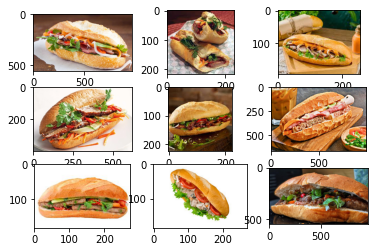

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/gdrive/MyDrive/Colab Notebooks/10_mon_an/10_mon_an/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'Banhmi' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder =  '/content/gdrive/MyDrive/Colab Notebooks/10_mon_an/10_mon_an/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Banhmi'):
    output = 0.0
  elif file.startswith('Banhbao'):
    output = 1.0
  elif file.startswith('Banhchuoi'):
    output = 2.0
  elif file.startswith('Banhtet'):
    output = 3.0
  elif file.startswith('Comtam'):
    output = 4.0
  elif file.startswith('Dauvexaothit'):
    output = 5.0
  elif file.startswith('Pho'):
    output = 6.0
  elif file.startswith('Thitkhotau'):
    output = 7.0
  elif file.startswith('banhchung'):
    output = 8.0
  elif file.startswith('banhxeo'):
    output = 9.0
  elif file.startswith('banhtaiheo'):
    output = 10.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('10_mon_an.npy', photos)
save('10_mon_an.npy', labels)

(110, 200, 200, 3) (110,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=50, verbose=1)
model.save('Food_model.h5')
classes = ["Banhmi", "Banhbao","Banhchuoi","Banhtet", "Comtam", "Dauvexaothit","Pho","Thikhotau","banhchung","banhxeo","banhtaiheo"]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 128)     

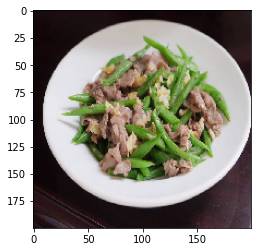

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/gdrive/MyDrive/Colab Notebooks/10_mon_an/10_mon_an/Dauvexaothit8.jpg', target_size=(200,200))
plt.imshow(img)

In [10]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  # 1: 1 ảnh, kích thước 32x32, 3 kênh màu, cifar10 nhận diện ảnh 32x32
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

[[0.09127796 0.08988851 0.08323485 0.09336997 0.09330519 0.10547944
  0.09369683 0.07831522 0.08637927 0.09387604 0.09117676]]
[5]
Dauvexaothit


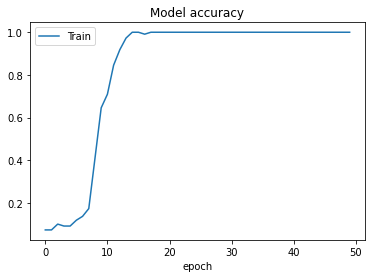

In [11]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()